# PyTorch - Getting Started

Author: Bingchen Wang

Last Updated: 21 Nov, 2022

This lab is adapted from <a href = "https://pytorch.org/tutorials/beginner/basics/intro.html">PyTorch Tutorials</a>.

## Contents

- [Tensors](#Tensors)
- [Datasets & DataLoaders](#D&D)
- [Transforms](#Transforms)
- [Build Model](#BM)
- [Autograd](#Autograd)
- Optimization
- Save & Load Model

In [1]:
import torch
import numpy as np
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Grayscale
import matplotlib.pyplot as plt

## Tensors
In PyTorch, the main objects used to encode the inputs and outputs of a model as well as the parameters are called **tensors**, which are similar to NumPy's ndarrays. An important *distinction* is that tensors can run on GPUs or other hardware accelerators.
### Initializing a Tensor
From other objects:
- `torch.tensor(list/array)`
- `torch.from_numpy(array)`
- `torch.ones_like(Tensor)` The new tensor retains the properties (shape, datatype) as the argument tensor, unless explicitly overrriden.
- `torch.zeros_like(Tensor)` The new tensor retains the properties (shape, datatype) as the argument tensor, unless explicitly overrriden.
- `torch.rand_like(Tensor)` The new tensor retains the properties (shape, datatype) as the argument tensor, unless explicitly overrriden.

By specifying a shape:
- `torch.ones(shape)`
- `torch.zeros(shape)`
- `torch.rand(shape)`
- `torch.randn(shape)`

In [2]:
# 1. Directly from data (list)
data = [[1, 2],[3,4]]
x_data = torch.tensor(data)
print(x_data)

tensor([[1, 2],
        [3, 4]])


In [3]:
# 2. From a NumPy array
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_np2 = torch.tensor(np_array)
print(x_np)
print(x_np2)

tensor([[1, 2],
        [3, 4]])
tensor([[1, 2],
        [3, 4]])


In [4]:
# 3. From anothr tensor
x_ones = torch.ones_like(x_data)
print(x_ones)
x_rand = torch.rand_like(x_data, dtype = torch.float)
print(x_rand)

tensor([[1, 1],
        [1, 1]])
tensor([[0.8127, 0.0742],
        [0.4468, 0.9417]])


In [5]:
# 4. By specifying a shape
shape = (3,2)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(5)
zeros_tensor = torch.zeros(2,5)
randn_tensor = torch.randn((3,3))
print(f'rand_tensor: \n {rand_tensor}')
print(f'ones_tensor: \n {ones_tensor}')
print(f'zeros_tensor: \n {zeros_tensor}')
print(f'randn_tensor: \n {randn_tensor}')

rand_tensor: 
 tensor([[0.9750, 0.8552],
        [0.8981, 0.7508],
        [0.5534, 0.4455]])
ones_tensor: 
 tensor([1., 1., 1., 1., 1.])
zeros_tensor: 
 tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
randn_tensor: 
 tensor([[ 1.1711, -0.1999, -0.0799],
        [ 0.8810,  0.2021,  0.2873],
        [-1.2668, -2.1923, -0.2464]])


### Attributes of a Tensor
- `.shape`
- `.dtype`
- `.device`

In [6]:
print(f'Tensor: \n {randn_tensor}, \n shape: {randn_tensor.shape} | dtype: {randn_tensor.dtype} | device: {randn_tensor.device}')

Tensor: 
 tensor([[ 1.1711, -0.1999, -0.0799],
        [ 0.8810,  0.2021,  0.2873],
        [-1.2668, -2.1923, -0.2464]]), 
 shape: torch.Size([3, 3]) | dtype: torch.float32 | device: cpu


### Operations on Tensor
- Moving a tensor to the GPU if available
- Standard numpy-like indexing and slicing
- Joining two tensors

#### Moving to the GPU

In [7]:
# Moving to the GPU, which does not work with MacBook Pro
if torch.cuda.is_available():
    ones_tensor = ones_tensor.to('cuda')

#### Numpy-like indexing, slicing and assignment

In [8]:
# Numpy-like indexing and slicing
print(f'randn_tensor[0]: {randn_tensor[0]}')
print(f'randn_tensor[:,0]: {randn_tensor[:,0]}')
print(f'randn_tensor[...,-1] (last column): {randn_tensor[...,-1]}')

# Numpy-like assignment
randn_tensor[2] = 0
print(randn_tensor)

randn_tensor[0]: tensor([ 1.1711, -0.1999, -0.0799])
randn_tensor[:,0]: tensor([ 1.1711,  0.8810, -1.2668])
randn_tensor[...,-1] (last column): tensor([-0.0799,  0.2873, -0.2464])
tensor([[ 1.1711, -0.1999, -0.0799],
        [ 0.8810,  0.2021,  0.2873],
        [ 0.0000,  0.0000,  0.0000]])


#### Joining multiple tensors

In [9]:
# Join horizontally
tensor1 = torch.ones(3,3)
tensor2 = torch.randn(3,4)
tensor3 = torch.zeros(2,3)
t1 = torch.cat([tensor1, tensor2], dim = 1)

# Join vertically
t2 = torch.cat([tensor1, tensor3], dim = 0)
print(f't1:\n{t1}\nt2:\n{t2}')

t1:
tensor([[ 1.0000,  1.0000,  1.0000, -0.0685, -1.1642,  1.3889, -1.4192],
        [ 1.0000,  1.0000,  1.0000, -1.9115, -0.6084,  1.2976, -1.6579],
        [ 1.0000,  1.0000,  1.0000, -2.2209,  0.1816, -0.6686,  0.3302]])
t2:
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [0., 0., 0.],
        [0., 0., 0.]])


#### Arithmetic Operations

In [10]:
# Addition with broadcasting
print(torch.tensor([[1,2]]) + torch.tensor([[0],[3]]))

# Subtraction
print(torch.tensor([3,4]) - 1)

# Element-wise product
t1 = torch.arange(1,10).reshape(3,3)
t2 = (torch.randn(3,3) >= 0).long() #convert dtype to tensor.long
print(t1 * t2)

# Matrix multiplication
print(t1 @ t2)
print(torch.matmul(t1, t2))

# Matrix transpose
print(t1.T)

# Sum
print(torch.sum(t1, axis = 0))
print(torch.sum(t1))
print(f'Convert to a Python numerical value: {torch.sum(t1).item()}')

# In-place operations
print(f'Operation that is not in-place: t1.add(1) \n{t1.add(1)}')
print(f't1: {t1}')
print(f'Operation that is in-place: t1.add_(1) \n{t1.add_(1)}')
print(f't1: {t1}')
print(f'Operation that is in-place: t1.subtract_(1) \n{t1.subtract_(1)}')
print(f't1: {t1}')

tensor([[1, 2],
        [4, 5]])
tensor([2, 3])
tensor([[1, 2, 3],
        [0, 5, 6],
        [0, 8, 9]])
tensor([[ 1,  6,  6],
        [ 4, 15, 15],
        [ 7, 24, 24]])
tensor([[ 1,  6,  6],
        [ 4, 15, 15],
        [ 7, 24, 24]])
tensor([[1, 4, 7],
        [2, 5, 8],
        [3, 6, 9]])
tensor([12, 15, 18])
tensor(45)
Convert to a Python numerical value: 45
Operation that is not in-place: t1.add(1) 
tensor([[ 2,  3,  4],
        [ 5,  6,  7],
        [ 8,  9, 10]])
t1: tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Operation that is in-place: t1.add_(1) 
tensor([[ 2,  3,  4],
        [ 5,  6,  7],
        [ 8,  9, 10]])
t1: tensor([[ 2,  3,  4],
        [ 5,  6,  7],
        [ 8,  9, 10]])
Operation that is in-place: t1.subtract_(1) 
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
t1: tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


### Bridge with Numpy
<div class = 'alert alert-block alert-danger'> <b>Note:</b> Tensors on the <b>CPU</b> and NumPy arrays can share their underlying memory locations, and <b>changing one will change the other</b>. </div>

In [11]:
x_tensor = torch.ones(5)
x_np = x_tensor.numpy()
print(x_tensor, x_np)
x_tensor[2] = 0
print(x_tensor, x_np)

x_numpy = np.ones(3)
x_t = torch.from_numpy(x_numpy)

x_numpy *= 5
print(x_numpy, x_t)

tensor([1., 1., 1., 1., 1.]) [1. 1. 1. 1. 1.]
tensor([1., 1., 0., 1., 1.]) [1. 1. 0. 1. 1.]
[5. 5. 5.] tensor([5., 5., 5.], dtype=torch.float64)


<a name = 'D&D'></a>
## Datasets & DataLoaders

PyTorch provides two data primitives: `torch.utils.data.DataLoader` and `torch.utils.data.Dataset` that allow you to use pre-loaded datasets as well as your own data. `Dataset` stores the samples and their corresponding labels, and `DataLoader` wraps an iterable around the Dataset to enable easy access to the samples.

### Load built-in datasets from TorchVision
Find a comprehensive list of image classification datasets <a href = "https://pytorch.org/vision/stable/datasets.html">here</a>. Here we use the <a href = 'https://www.cs.toronto.edu/~kriz/cifar.html'>CIFAR-10 dataset</a>.

In [12]:
training_data = datasets.CIFAR10(
    root="CIFAR-10 dataset",
    train=True,
    download=False,
    transform=ToTensor()
)

test_data = datasets.CIFAR10(
    root="CIFAR-10 dataset",
    train=False,
    download=False,
    transform=ToTensor()
)

### Preparing the data for training with DataLoader

`Dataset` retrieves data one example at a time. To pass examples in mini-batches, reshuffle the data at each epoch (to avoid model overfitting) and use vectorization, we use `DataLoader`, an iterable that is wrapped around `Dataset`.

Note:
- By setting `shuffle = True`, the data is reshuffled after we iterate over *all* mini-batches.

In [13]:
train_dataloader = DataLoader(training_data, batch_size = 64, shuffle = True)
test_dataloader = DataLoader(test_data, batch_size = 64, shuffle = True)

### Iterating through a DataLoader
- `iter()` is used to get an iterator from the iterable `DataLoader`
- `next()` consumes the next item in the iterator

Feature mini-batch shape: torch.Size([64, 3, 32, 32])
Label mini-batch shape: torch.Size([64])


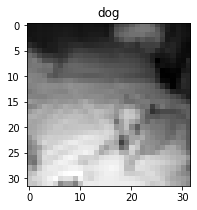

In [14]:
labels_dict = {0: 'airplane', 1: 'automobile', 2: 'bird', 3:'cat', 4:'deer',
              5: 'dog', 6:'frog', 7:'horse', 8: 'ship', 9:'truck'}
train_it = iter(train_dataloader)
train_features, train_labels = next(train_it)
print(f"Feature mini-batch shape: {train_features.shape}")
print(f"Label mini-batch shape: {train_labels.shape}")
plt.figure(figsize = (3,3))
plt.imshow(torch.movedim(Grayscale()(train_features[0]),0,-1), cmap = "gray")
plt.title(labels_dict[train_labels[0].item()])
plt.show()

## Transforms
`torchvision.transforms.Lambda` applies any user-defined lambda function to the data.

### One-hot encoding of the labels

In [15]:
target_transform = Lambda(lambda y: torch.zeros(10, dtype = torch.float).scatter_(dim = 0, index = torch.tensor(y), value = 1))
print(target_transform([1]))

# training_data = datasets.CIFAR10(
#     root="CIFAR-10 dataset",
#     train=True,
#     download=False,
#     transform=ToTensor(),
#     target_transform = Lambda(lambda y: torch.zeros(10, dtype = torch.float).scatter_(dim = 0, index = torch.tensor(y), value = 1))
# target_transform([1])
# )

tensor([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])


<a name = "BM"></a>
## Build Model

We can build a neural network by subclassing `nn.Module`. Layers of a neural network are also subclasses of `nn.Module`. We can specify the neural network structure and initialize the layers in `__init__`. Every `nn.Module` implements operations on the input data through the `forward` method.

In [16]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.grayscale = Grayscale()
        self.flatten = nn.Flatten()
        self.simple_network = nn.Sequential(
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512,512),
            nn.ReLU(),
            nn.Linear(512,10)
        )
    def forward(self, x):
        x = self.flatten(self.grayscale(x))
        logits = self.simple_network(x)
        return logits
    def predict_prob(self, x):
        logits = self.forward(x)
        softmax_prob = nn.Softmax(dim = 1)(logits)
        return softmax_prob
    def predict(self, x):
        logits = self.forward(x)
        y_pred = logits.argmax(1)
        return y_pred

In [17]:
model = NeuralNetwork()
print(model)

NeuralNetwork(
  (grayscale): Grayscale(num_output_channels=1)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (simple_network): Sequential(
    (0): Linear(in_features=1024, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=512, bias=True)
    (5): ReLU()
    (6): Linear(in_features=512, out_features=10, bias=True)
  )
)


### Model Parameters

We can access the parameters of a model using `.parameters()` and `.named_parameters()`.

In [18]:
for name, param in model.named_parameters():
    print(f"Layer: {name}, size: {param.shape} \nFirst two rows of values: \n{param[:2]}\n" + '-'*100)

Layer: simple_network.0.weight, size: torch.Size([512, 1024]) 
First two rows of values: 
tensor([[-0.0149,  0.0002, -0.0225,  ...,  0.0069, -0.0056,  0.0110],
        [ 0.0050, -0.0179, -0.0249,  ...,  0.0240,  0.0059, -0.0310]],
       grad_fn=<SliceBackward0>)
----------------------------------------------------------------------------------------------------
Layer: simple_network.0.bias, size: torch.Size([512]) 
First two rows of values: 
tensor([-0.0008, -0.0101], grad_fn=<SliceBackward0>)
----------------------------------------------------------------------------------------------------
Layer: simple_network.2.weight, size: torch.Size([512, 512]) 
First two rows of values: 
tensor([[ 0.0222, -0.0401,  0.0226,  ...,  0.0357, -0.0230,  0.0202],
        [-0.0309, -0.0075, -0.0246,  ...,  0.0194, -0.0060,  0.0031]],
       grad_fn=<SliceBackward0>)
----------------------------------------------------------------------------------------------------
Layer: simple_network.2.bias, size:

## Autograd

PyTorch has a built-in differentiation engine called `torch.autograd`, which supports automatic computation of gradient for any computational graph. A reference to the backpropagation function is stored in the `grad_fn` of a tensor. 

In order to run backprop on some parameter tensors, we need to set the `requires_grad` property of the tensor to be `True`. This can be done upon creating or later using the `theta.requires_grad_(True)`. Note that **by default, all tensors with `requires_grad = True` are tracking their computational history and support gradient computation.** To turn it off and stop tracking, we can surround the code with a `torch.no_grad()` block. Another way is to use `theta_det = theta.detach()`.

To compute the derivatives of the loss with respect to some parameters $\theta$, first call `loss.backward()` and then call `theta.grad`.

### PyTorch accumulates the gradients
When doing backpropgation, PyTorch accumulates the gradients, every time `.backward()` is called, the computed gradients are added to the gradient property of all leaf nodes of computational graph. To compute proper gradients, use `theta.grad.zero_()` ahead of the call or use an optimizer.
- `.backward()` computes `torch.tensor(1.0) * J`
- `.backward(v)` computes `torch.tensor(v.t()) * J`.

In [19]:
inp = torch.eye(4,5, requires_grad = True)
print(inp)
out = (inp+1).pow(2).t()
print(out)

tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.]], requires_grad=True)
tensor([[4., 1., 1., 1.],
        [1., 4., 1., 1.],
        [1., 1., 4., 1.],
        [1., 1., 1., 4.],
        [1., 1., 1., 1.]], grad_fn=<TBackward0>)


In [20]:
out.backward(torch.ones_like(out), retain_graph = True)

In [21]:
print(f"First call\n{inp.grad}")
inp.grad.zero_()
out.backward(torch.eye(*out.shape), retain_graph = True)
print(f"New call\n{inp.grad}")

First call
tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.]])
New call
tensor([[4., 0., 0., 0., 0.],
        [0., 4., 0., 0., 0.],
        [0., 0., 4., 0., 0.],
        [0., 0., 0., 4., 0.]])


## Optimization

In [22]:
# set the hyperparameters
learning_rate = 1e-3
batch_size = 64
epochs = 10

### Typical loss functions
- `nn.MSELoss()`
- `nn.CrossEntropyLoss()`
- `nn.L1Loss()`
- `nn.NLLLoss()`

In [23]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

### Typical optimization algrithms
- `torch.optim.Adam()`
- `torch.optim.SGD()`
- `torch.optim.RMSprop()`

In [24]:
# Specify the optimizer
optimizer = torch.optim.Adam(params = model.parameters(), lr = learning_rate)

### Optimization in the training loop
- Step 1: reset the gradients of model parameters: `optimizer.zero_grad()`
- Step 2: backprop the prediction loss (and the gradients are deposited by PyTorch): `loss.backward()`
- Step 3: update the parameters using the stored gradients: `optimizer.step()`

In [25]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    
    for batch, (X,y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)
        
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f'loss:{loss:>7f} [{current:>5d}/{size:>5d}]')

def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [26]:
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss:2.301201 [    0/50000]
loss:2.174696 [ 6400/50000]
loss:2.068370 [12800/50000]
loss:2.081838 [19200/50000]
loss:2.041301 [25600/50000]
loss:1.812771 [32000/50000]
loss:1.843223 [38400/50000]
loss:2.221197 [44800/50000]
Test Error: 
 Accuracy: 31.4%, Avg loss: 1.919091 

Epoch 2
-------------------------------
loss:1.859148 [    0/50000]
loss:1.930200 [ 6400/50000]
loss:2.104660 [12800/50000]
loss:1.889502 [19200/50000]
loss:2.003397 [25600/50000]
loss:1.970841 [32000/50000]
loss:1.766366 [38400/50000]
loss:1.952714 [44800/50000]
Test Error: 
 Accuracy: 33.2%, Avg loss: 1.868127 

Epoch 3
-------------------------------
loss:1.784491 [    0/50000]
loss:1.994488 [ 6400/50000]
loss:1.750439 [12800/50000]
loss:1.707920 [19200/50000]
loss:1.759058 [25600/50000]
loss:1.922291 [32000/50000]
loss:1.813684 [38400/50000]
loss:1.810835 [44800/50000]
Test Error: 
 Accuracy: 35.3%, Avg loss: 1.806244 

Epoch 4
-------------------------------
loss:1.65581

In [30]:
train_dataloader.dataset[1]

(tensor([[[0.6039, 0.4941, 0.4118,  ..., 0.3569, 0.3412, 0.3098],
          [0.5490, 0.5686, 0.4902,  ..., 0.3765, 0.3020, 0.2784],
          [0.5490, 0.5451, 0.4510,  ..., 0.3098, 0.2667, 0.2627],
          ...,
          [0.6863, 0.6118, 0.6039,  ..., 0.1647, 0.2392, 0.3647],
          [0.6471, 0.6118, 0.6235,  ..., 0.4039, 0.4824, 0.5137],
          [0.6392, 0.6196, 0.6392,  ..., 0.5608, 0.5608, 0.5608]],
 
         [[0.6941, 0.5373, 0.4078,  ..., 0.3725, 0.3529, 0.3176],
          [0.6275, 0.6000, 0.4902,  ..., 0.3882, 0.3137, 0.2863],
          [0.6078, 0.5725, 0.4510,  ..., 0.3216, 0.2745, 0.2706],
          ...,
          [0.6549, 0.6039, 0.6275,  ..., 0.1333, 0.2078, 0.3255],
          [0.6039, 0.5961, 0.6314,  ..., 0.3647, 0.4471, 0.4745],
          [0.5804, 0.5804, 0.6118,  ..., 0.5216, 0.5255, 0.5216]],
 
         [[0.7333, 0.5333, 0.3725,  ..., 0.2784, 0.2784, 0.2745],
          [0.6627, 0.6039, 0.4627,  ..., 0.3059, 0.2431, 0.2392],
          [0.6431, 0.5843, 0.4392,  ...,